In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [14]:
# Plot Time Series Graph
def plot_time_series(time, series, format='-', start=0, end=None, label=None):
  plt.plot(time[start:end], series[start:end], format, label=label)
  plt.xlabel('Time')
  plt.ylabel('Value')
  if label:
    plt.legend(fontsize=14)
  plt.grid(True)  

# To generate trend
def trend(time, slope=0):
  return time * slope

# To generate Seasonal Pattern
def seasonal_pattern(season_time):
  return np.where(season_time < 0.4,
                  np.cos(season_time * 2 * np.pi),
                  1 / np.exp(3 * season_time))
  
# To generate seasonality data
def seasonality(time, period, amplitude=1, phase=0):
  season_time = ((time + phase) % period) / period
  return amplitude * seasonal_pattern(season_time)

# To generate noise
def white_noise(time, noise_level=1, seed=None):
  rnd = np.random.RandomState(seed)
  return rnd.randn(len(time)) * noise_level

In [4]:
time = np.arange(4 * 365 + 1)
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [5]:
slope = 0.05
baseline = 10
amplitude = 40

series = baseline + trend(time + slope) + seasonality(time, period=365, amplitude=amplitude)
series

array([50.        , 49.99407357, 49.97629603, ..., 12.02448999,
       12.00791854, 50.        ])

In [6]:
noise_level = 5
noise = white_noise(time, noise_level=noise_level, seed=42)
noise

array([ 2.48357077, -0.69132151,  3.23844269, ...,  6.44876377,
        3.36590676, -0.69227992])

In [7]:
series += noise
series

array([52.48357077, 49.30275206, 53.21473872, ..., 18.47325376,
       15.37382529, 49.30772008])

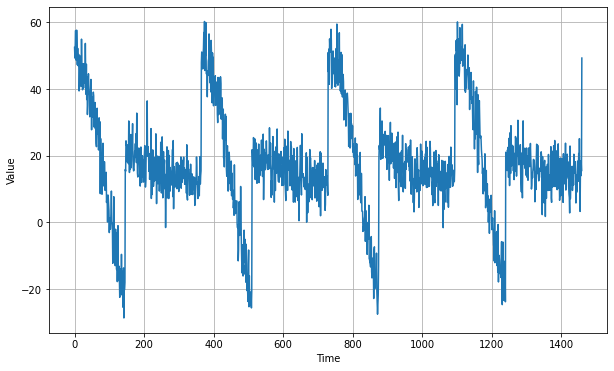

In [8]:
plt.figure(figsize=(10, 6))
plot_time_series(time, series)
plt.show()

# **Naive Forecast**

In [9]:
split_time = 1000

time_train = time[:split_time]
time_valid = time[split_time:]

x_train = series[:split_time]
x_valid = series[split_time:]

In [12]:
x_valid

array([ 21.34471371,  18.93551494,  14.57519969,  11.00735421,
        17.69843149,  16.14030291,  18.61468503,  17.28070049,
        19.3190049 ,  11.36174015,  20.5918342 ,  14.96008011,
        24.315873  ,  10.46138224,  22.55515699,  14.83317034,
        10.55506451,  11.361521  ,  12.14826468,  15.84013535,
        16.30303871,  10.7901661 ,  13.50694517,  24.31036708,
        22.20727142,  15.72195535,  13.70137499,  14.08277204,
        16.52169834,   8.31187207,  12.11091006,   5.02705977,
        15.3385108 ,  16.55101574,  10.87196852,  21.13092156,
         7.10546664,   5.88594625,  14.30382215,  18.39101191,
        21.54932937,  10.80965153,  18.47206865,  12.86092175,
        12.16533348,  17.42198015,  16.24070825,   5.07274772,
        20.31322451,  19.80699176,   9.75493006,  14.83816456,
        15.30589429,  14.11590023,  10.03798368,   9.4085591 ,
        12.61625898,  18.5852132 ,  15.4172915 ,  10.82412404,
        16.51377508,  -1.60916636,  18.35581837,   3.89

In [10]:
naive_forecast = series[split_time - 1: -1]
naive_forecast

array([ 17.24673417,  21.34471371,  18.93551494,  14.57519969,
        11.00735421,  17.69843149,  16.14030291,  18.61468503,
        17.28070049,  19.3190049 ,  11.36174015,  20.5918342 ,
        14.96008011,  24.315873  ,  10.46138224,  22.55515699,
        14.83317034,  10.55506451,  11.361521  ,  12.14826468,
        15.84013535,  16.30303871,  10.7901661 ,  13.50694517,
        24.31036708,  22.20727142,  15.72195535,  13.70137499,
        14.08277204,  16.52169834,   8.31187207,  12.11091006,
         5.02705977,  15.3385108 ,  16.55101574,  10.87196852,
        21.13092156,   7.10546664,   5.88594625,  14.30382215,
        18.39101191,  21.54932937,  10.80965153,  18.47206865,
        12.86092175,  12.16533348,  17.42198015,  16.24070825,
         5.07274772,  20.31322451,  19.80699176,   9.75493006,
        14.83816456,  15.30589429,  14.11590023,  10.03798368,
         9.4085591 ,  12.61625898,  18.5852132 ,  15.4172915 ,
        10.82412404,  16.51377508,  -1.60916636,  18.35

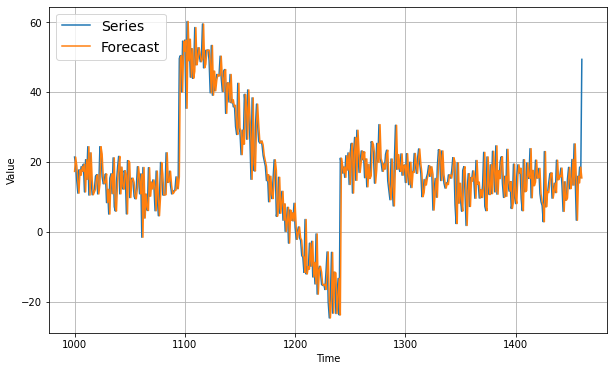

In [15]:
plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid, label='Series')
plot_time_series(time_valid, naive_forecast, label='Forecast')

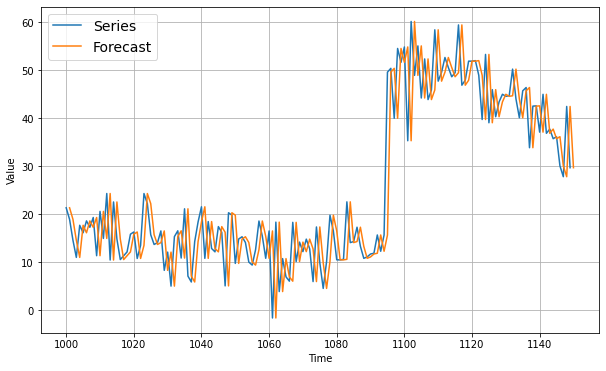

In [16]:
# Zoom it
plt.figure(figsize=(10, 6))
plot_time_series(time_valid, x_valid, start=0, end=150, label='Series')
plot_time_series(time_valid, naive_forecast, start=1, end=151, label='Forecast')

In [17]:
# Now Compute error
errors = naive_forecast - x_valid
abs_error = np.abs(errors)
mae = np.mean(abs_error)
mae

5.9392272847612935